<a href="https://colab.research.google.com/github/obaidsi/Time-domain-signal-denoising/blob/main/time_domain_signal_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time-Domain Signal Denoising & Feature Enhancement

## Overview
This notebook demonstrates practical time-domain signal preprocessing techniques used to improve signal quality and enhance transient activity in noisy data. The methods shown here are commonly used in DSP pipelines for sensor and biomedical-style signals.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def windowed_mean_smoother(x, k):
    """
    Windowed mean smoothing.
    For each sample t, replace x[t] with the mean of x[t-k : t+k+1].
    Edges are left unchanged to avoid boundary issues.
    """
    x = np.asarray(x, dtype=float)
    y = x.copy()
    n = len(x)

    for t in range(k, n - k):
        y[t] = np.mean(x[t - k : t + k + 1])

    return y


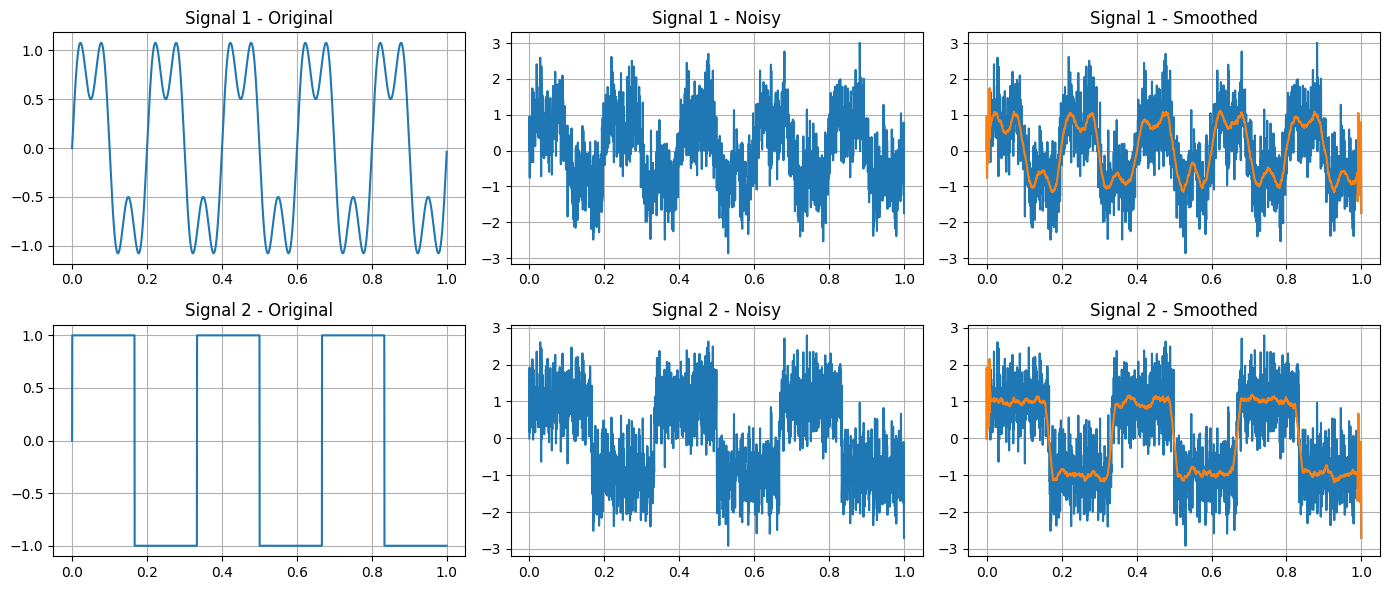

In [ ]:
# Parameters
n = 2000
t = np.linspace(0, 1, n, endpoint=False)

k = 20          # smoothing half-window
noise_amp = 0.6 # try 0.2, 0.6, 1.0 later

# Two different base signals (different shapes)
x1 = np.sin(2*np.pi*5*t) + 0.5*np.sin(2*np.pi*15*t)    # smooth multi-tone
x2 = np.sign(np.sin(2*np.pi*3*t))                      # square-like

# Same noise added to both
noise = noise_amp * np.random.randn(n)
x1_noisy = x1 + noise
x2_noisy = x2 + noise

# Apply windowed mean smoothing
x1_smooth = windowed_mean_smoother(x1_noisy, k)
x2_smooth = windowed_mean_smoother(x2_noisy, k)

# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(14, 6))

# ---------- FIRST SIGNAL ----------
# Original
axes[0][0].plot(t, x1)
axes[0][0].set_title("Signal 1 - Original")

# Noisy
axes[0][1].plot(t, x1_noisy)
axes[0][1].set_title("Signal 1 - Noisy")

# Noisy + Smoothed
axes[0][2].plot(t, x1_noisy)
axes[0][2].plot(t, x1_smooth)
axes[0][2].set_title("Signal 1 - Smoothed")


# ---------- SECOND SIGNAL ----------
# Original
axes[1][0].plot(t, x2)
axes[1][0].set_title("Signal 2 - Original")

# Noisy
axes[1][1].plot(t, x2_noisy)
axes[1][1].set_title("Signal 2 - Noisy")

# Noisy + Smoothed
axes[1][2].plot(t, x2_noisy)
axes[1][2].plot(t, x2_smooth)
axes[1][2].set_title("Signal 2 - Smoothed")


# Add grid to every plot
for row in axes:
    for ax in row:
        ax.grid(True)

# Adjust spacing and show
plt.tight_layout()
plt.show()
